<a href="https://colab.research.google.com/github/erYash15/Real-or-Not-NLP-with-Disaster-Tweets/blob/master/Real_or_Not_NLP_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP DISASTER TWEETS: EDA, PLOTLY, NLP, TENSORFLOW, KERAS

Table of Contents

Introduction
References
BERT Model
Libraries
Loading Data
Exploratory Data Analysis of Tweets
Show percentage of tweets marked as Disaster tweets
sentence length analysis
Tweet Word count analysis
Tweet stop word analysis
Tweet Puntuation and space word analysis
NGRAMS
Data Cleaning
Remove URL from the tweet
Remove # from the text
Remove Emoji from the tweet
Remove HTML Tags from Tweet
Remove Punctuations from the Tweet
Spell correction in tweets
Remove Stopwords from tweets
Filling Missing values
WordCloud Map
Modeling With BERT
Building BERT Model With PyTorch
Tokenization
Map Tokens
Create a TensorDataSet
Create Validation Dataset from TrainSet
Create BERT Data Loader
LOAD BERT Pretrained Sequence Classification
Setup AdamW BERT Optimizer
Create Learning rate scheduler with warmup

### Introduction

My name is <b>Yash Gupta</b>. This project was made for <b>Natural Language Processing</b> Course. As a part of the course we came across many machine learning/ Data science aspects. I believe the Kaggle is the right place to practice with recent technologies in the area of data science and good place to refer all kinds of data science related projects. In this Kernal I have implemented Machine Learning and Deep Learning models for classification.

### Libraries

In [ ]:
# Data Manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# NLP libraries
import string # Library for string operations
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re # Regex library
import demoji
from wordcloud import WordCloud # Word Cloud library

# ploting libraries
import plotly
import plotly.graph_objects as go
from plotly.graph_objs import *
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# ML/AI libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

### Loading Data

In [ ]:
data = pd.read_csv("tweets.csv")

# Basic Info
print("Total DataSet: ", len(data))
print("Columns: ", list(data.columns))

X = data[["id", "keyword", "location", "text"]] # Features
y = data[["id","target"]] #Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

data.head(3)

Total DataSet:  11370
Columns:  ['id', 'keyword', 'location', 'text', 'target']
Training Data 9096
Testing Data 2274


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1


## Exploratory Data Analysis

### Analyzing Lables

In [ ]:
Grouped_Disaster = y_train.groupby(['target']).count()
#print(Grouped_Disaster)
labels = ['Disaster','Non-Disaster']

# https://plotly.com/python/pie-charts/
# Use `hole` to create a donut-like pie chart

fig = go.Figure(data=[go.Pie(labels=labels, values=Grouped_Disaster['id'], hole=.5)])
fig.update_layout(legend_bgcolor = '#000000',title_font_color = '#000000',paper_bgcolor = '#ffffff',height=400,title_x=0.5,width=400, title_text='Disaster Vs Non- Disaster Tweet Percentage',
                 annotations=[dict(bgcolor = '#000000',text='Tweets', x=0.5, y=0.5, font_size=20, showarrow=False)])

plotly.offline.iplot(fig)

NameError: name 'y_train' is not defined

## Analyzing Features

### Sentence length analysis

In [ ]:
X_train['length'] = X_train['text'].apply(lambda x:  len(str(x)))
X_train.head(3)

,id,keyword,location,text,length
3912,3912,destroy,NaN,why the hell would want to join the Kenyan Cab...,86
5902,5902,flooding,NaN,Citizens United wreaked havoc on our democracy...,121
11305,11305,wreckage,NaN,"Through all the happiness and sorrow, I guess ...",139


In [ ]:
Top_20_Lengthy_Tweets = X_train.sort_values('length',ascending=False)[:20][::-1]
Bottom_20_Lengthy_Tweets = X_train.sort_values('length',ascending=True)[:20][::-1]

Tweetlength_Data = np.array(X_train['length'])#.describe()
norm = np.linalg.norm(Tweetlength_Data)
normal_Tweetlength_Data = Tweetlength_Data/norm

# Create distplot
fig = ff.create_distplot([Tweetlength_Data], ['Tweet length Data'], show_hist=False, colors=['#37AA9C'])
iplot(fig, filename='Distplot of attack and defense')


### Data Cleaning 

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.<br><br>
Step 1. Remove Url<br>
Step 2. Handle Tags<br>
Step 3. Handle emoji's<br>
Step 4. Remove HTML Tags<br>
Step 5. Remove stopwords<br>
Step 6. Removing Useless Characters

#### Step 1. Remove Url

In [ ]:
#https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/11332580
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [ ]:
print("Example of text with URL: \n", X_train['text'][3912], end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_Url)
print("Example of text without URL: \n", X_train['text'][3912])

Example of text with URL: 
 why the hell would want to join the Kenyan Cabinet? why would… https://t.co/l91GiZ6Wjr

Example of text without URL: 
 why the hell would want to join the Kenyan Cabinet? why would… 


#### Step 2. Handle Tags

In [ ]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)

In [ ]:
print("Example of text without Handling Tags: \n", X_train['text'][3914],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train['text'][3914])

Example of text without Handling Tags: 
 #WednesdayWisdom Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu…

Example of text with Handling Tags: 
  Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu… WednesdayWisdom WednesdayWisdom WednesdayWisdom


#### Step 3. Handle emoji's

In [ ]:
#http://unicode.org/Public/emoji/12.0/emoji-test.txt
demoji.download_codes()

... OK (Got response in 1.14 seconds)
Writing emoji data to C:\Users\Yash Gupta\.demoji\codes.json ...
... OK


In [ ]:
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

In [ ]:
print("Example of text without Handled Emojis: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_emoji)
print("Example of text with Handled Emoji: \n", X_train['text'][17])


Example of text without Handled Emojis: 
 Rengoku sets my heart ablaze😔❤️🔥 P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text with Handled Emoji: 
 Rengoku sets my heart ablaze:pensive face::red heart::fire: P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃


#### Step 4. Remove HTML Tags

In [ ]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [ ]:
X_train['text'] = X_train['text'].apply(Remove_html)

#### Step 5. Remove Stopwords and Stemming

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopword = stopwords.words('english')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [ ]:
print("Example of text before Removing Stopwords: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train['text'][17])

Example of text before Removing Stopwords: 
 Rengoku sets my heart ablaze:pensive face::red heart::fire: P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text after Removing Stopwords and Stemming: 
 rengoku set heart ablaze:pens face::r heart::fire: p.s. i miss style color i c: 鬼滅の刃 鬼滅の刃 鬼滅の刃


#### Step 6. Removing Useless Characters

In [ ]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring) 

In [ ]:
print("Example of text before Removing Useless Character: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", X_train['text'][17])

Example of text before Removing Useless Character: 
 rengoku set heart ablaze:pens face::r heart::fire: p.s. i miss style color i c: 鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text after Removing Useless Character: 
 rengoku set heart ablazepens facer heartfire miss style color 


In [ ]:
def merging_details(data):
        #df = pd.DataFrame(columns=['id', 'Cleaned_data'])
        df_list = []
        
        #https://www.geeksforgeeks.org/how-to-iterate-over-rows-in-pandas-dataframe/
        for row in data.itertuples():
            df_dict = {}
            # Processing Keyword and location
            keyword = re.sub(r'[^a-zA-Z\s]','', str(row[2]))
            location = re.sub(r'[^a-zA-Z\s]','', str(row[3]))
            keyword = re.sub(r'\b\w{1,2}\b', '', keyword)
            location = re.sub(r'\b\w{1,2}\b', '', location)
            # Already processed data
            text = str(row[4])

            if keyword == 'nan':
                if location == 'nan':    
                    prs_data = text
                else:
                    prs_data = location + ' ' + text
            else:
                if location == 'nan':    
                    prs_data = keyword + ' ' + text
                else:
                    prs_data = keyword + ' ' + location + ' ' + text                
            
            prs_data = re.sub(' +', ' ', prs_data) 
            
            df_dict['Cleaned_data'] = prs_data
            
            df_list.append(df_dict)
                 
        return pd.DataFrame(df_list)

In [ ]:
X_train = merging_details(X_train)

In [ ]:
X_train

,Cleaned_data
0,destroy hell would want join kenyan cabinet would
1,flooding citizen unit wreak havoc democracy de...
2,wreckage through happi sorrow guess again live...
3,derailed Pittsburgh rememb cheer derail campai...
4,wrecked Oklahoma City first listen also whip d...
...,...
9091,wreck after caus wreck theyr like
9092,explosion Lagos Nigeria let get starboy subscr...
9093,fatalities been long day storm survey one team...
9094,blaze Kampala Uganda work next one lead govern...


####  WORDCLOUD 

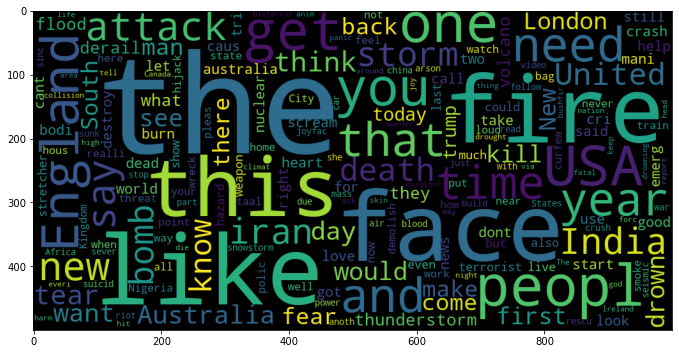

Wall time: 2.9 s


In [ ]:
%%time
dict_of_words = {}
for row in  X_train.itertuples():
    for i in row[1].split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

# Final Pre-Processing Data For Modelling

In [ ]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)
# Step7. Merging Other Details
X_test = merging_details(X_test)

In [ ]:
X_test

,Cleaned_data
0,demolished Observation drone how mani illeg bu...
1,fatality who fatal tho
2,sunk London chines state media confirm iranian...
3,windstorm London with luck miss windstorm eith...
4,buildingsonfire inferno black friday deaths bu...
...,...
2269,eyewitness United States plp leader call hypoc...
2270,thunderstorm Pluto cant sleep open window take...
2271,attacked Lagos Nigeria son teenag girl arrest ...
2272,loudbang Michigan USA brother got bathroom hea...


In [ ]:
y_train = y_train['target']
y_test = y_test['target']

In [ ]:
%%time
#smooth_idf=True by default so smoothing is done by defult.
#norm is l2 by default.
#subliner is used False by default.
vectorizer = TfidfVectorizer(min_df = 0.0005, 
                             max_features = 100000, 
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['Cleaned_data'])
X_test = vectorizer.transform(X_test['Cleaned_data'])

Wall time: 862 ms


In [ ]:
#https://stackoverflow.com/questions/16505670/generating-a-dense-matrix-from-a-sparse-matrix-in-numpy-python
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  9096 | Training Features: 4678
Testing Points:  2274 | Testing Features: 4678

Training Points:  9096
Testing Points:  2274


## Machine Learning

### Logistic Regression 

In [ ]:
Model = LogisticRegression(C=1,penalty='l2')

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.882145998240985
Macro precision_recall_fscore_support
(0.8699936326010824, 0.6875221867234647, 0.7336249580396106, None)
Micro precision_recall_fscore_support
(0.882145998240985, 0.882145998240985, 0.8821459982409852, None)
Weighted precision_recall_fscore_support
(0.8794031445542358, 0.882145998240985, 0.8632528623849799, None)


### Naive Bayes

#### Gaussian Naive Bayes

In [ ]:
Model = GaussianNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.6543535620052771
Macro precision_recall_fscore_support
(0.6183811954769804, 0.7030528931487399, 0.5947656286133786, None)
Micro precision_recall_fscore_support
(0.6543535620052771, 0.6543535620052771, 0.6543535620052771, None)
Weighted precision_recall_fscore_support
(0.8218584748469638, 0.6543535620052771, 0.696037781465206, None)


#### Bernoulli Naive Bayes

In [ ]:
Model = BernoulliNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8948988566402815
Macro precision_recall_fscore_support
(0.8415110917021487, 0.7649901571626812, 0.7951047820043453, None)
Micro precision_recall_fscore_support
(0.8948988566402815, 0.8948988566402815, 0.8948988566402815, None)
Weighted precision_recall_fscore_support
(0.8882727156018607, 0.8948988566402815, 0.8882962241029322, None)


#### Complement Naive Bayes

In [ ]:
Model = ComplementNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8570800351802991
Macro precision_recall_fscore_support
(0.7536186200895507, 0.795898279923839, 0.7712363575244062, None)
Micro precision_recall_fscore_support
(0.8570800351802991, 0.8570800351802991, 0.8570800351802991, None)
Weighted precision_recall_fscore_support
(0.8712028357064902, 0.8570800351802991, 0.8625646635445304, None)


####  Multinomial Naive Bayes

In [ ]:
Model = MultinomialNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8812664907651715
Macro precision_recall_fscore_support
(0.878383190883191, 0.6800150062929615, 0.7267527557036657, None)
Micro precision_recall_fscore_support
(0.8812664907651715, 0.8812664907651715, 0.8812664907651715, None)
Weighted precision_recall_fscore_support
(0.880588067263529, 0.8812664907651715, 0.8606646594236373, None)


### Support Vector Machines (SVM)

#### RBF Kernel SVM

In [ ]:
Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8913808267370272
Macro precision_recall_fscore_support
(0.8787831991418029, 0.7160301094007164, 0.763219564386187, None)
Micro precision_recall_fscore_support
(0.8913808267370272, 0.8913808267370272, 0.8913808267370272, None)
Weighted precision_recall_fscore_support
(0.8887991240860746, 0.8913808267370272, 0.8767491464566864, None)


#### Linear Kernel SVM 

In [ ]:
Model = svm.SVC(kernel='linear') 
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8922603342128408
Macro precision_recall_fscore_support
(0.8483583548099677, 0.7444613870332719, 0.7815103640709591, None)
Micro precision_recall_fscore_support
(0.8922603342128408, 0.8922603342128408, 0.8922603342128408, None)
Weighted precision_recall_fscore_support
(0.8854100253538504, 0.8922603342128408, 0.8828886566900256, None)


### Random Forest 

In [ ]:
Model = RandomForestClassifier(random_state=0)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8856640281442393
Macro precision_recall_fscore_support
(0.8479522435011062, 0.716554522864427, 0.7578842017844594, None)
Micro precision_recall_fscore_support
(0.8856640281442393, 0.8856640281442393, 0.8856640281442393, None)
Weighted precision_recall_fscore_support
(0.878626702799198, 0.8856640281442393, 0.8725147724050367, None)


## Deep Learning 

### MLP

In [ ]:
import keras